In [2]:
import numpy as np
from qiskit import *
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_histogram, plot_bloch_multivector
from qiskit_aer import *

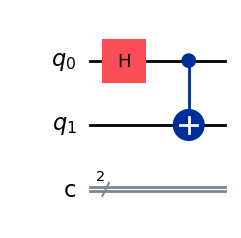

In [3]:
bell = QuantumCircuit(2,2)
bell.h(0)
bell.cx(0,1)
bell.draw('mpl')

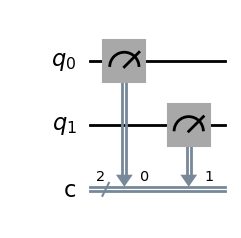

In [4]:
meas = QuantumCircuit(2,2)
meas.measure([0,1], [0,1])
meas.draw('mpl')

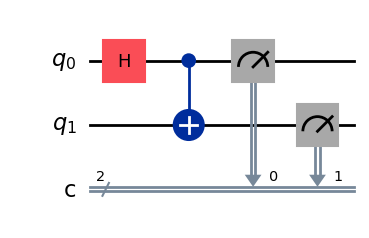

In [5]:
circ = bell.compose(meas)
circ.draw('mpl')

In [6]:
simulator = Aer.get_backend('statevector_simulator')
pm = generate_preset_pass_manager(optimization_level=0,backend=simulator)
transpile= pm.run(circ)
counts = simulator.run(transpile,shots=1024).result().get_counts()

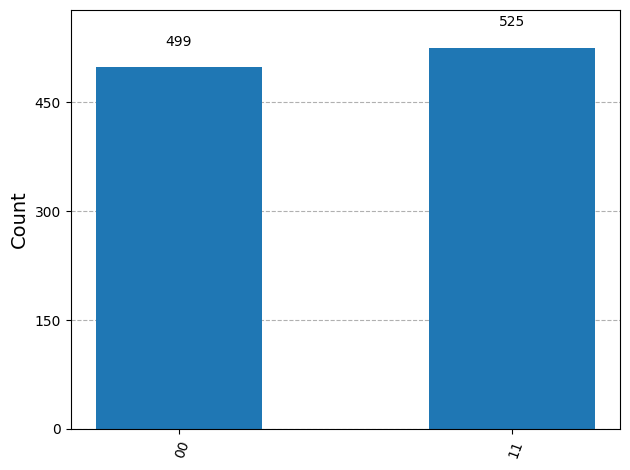

In [7]:
plot_histogram(counts)